# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC


sys.path.insert(1, '../')
from classification_utilities import *

In [3]:
# Create output folder
out_dir = 'results/'
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [4]:
# Extract dataset divided into development and test set
tr, ts, tr_target, ts_target = prepare_data(MinMaxScaler())

In [5]:
print(f'Number of samples in Training set:', len(tr))
print(f'Number of samples in Test set:', len(ts))
tr.shape

Number of samples in Training set: 9206
Number of samples in Test set: 2302


(9206, 38)

For each model we compute two grid searches one with three types of feature selection (SelectKBest, RFECV, SelectFromModel) and one without. After that we show the results of the best model for each approach and save the confusion matrices.

# Decision Tree

In [22]:
parameters = {
    'criterion': ['gini', 'entropy','log_loss'],
    'splitter': ['random','best'],
    'max_depth': [4,8,16,None],
    'min_samples_split': [2,4,8,16,32],
    'min_samples_leaf': [1,2,4,8],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [42],
    'max_leaf_nodes': [None],
    'min_impurity_decrease': [0.0, 1e-2],
}

d_tree = DecisionTreeClassifier()

In [ ]:
results_df = grid_search(DecisionTreeClassifier, parameters, 'decision_tree', tr, tr_target)

In [ ]:
grid_search_with_feature_selection(DecisionTreeClassifier, parameters, 'decision_tree', tr, ts, tr_target, ts_target, n_jobs=5,
                                   folds=4, n_features=15)

Best combo:
	params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 16, 'random_state': 42, 'splitter': 'best'}
	mean_train_accuracy: 0.8597653775414226
	mean_train_recall: 0.9923019510249732
	mean_train_precision: 0.7948279807242365
	mean_train_f1: 0.8826542625731914
	mean_val_accuracy: 0.8599827314154576
	mean_val_recall: 0.992438301294898
	mean_val_precision: 0.7950281295798927
	mean_val_f1: 0.8828298745235377

Test set metrics: 
Accuracy 0.8479582971329279
Precision test set  0.8799979704258796
Recall test set  0.8479582971329279
F1 score test set  0.8429669648030279
Support test set  (array([0.99457259, 0.77891374]), array([0.67933272, 0.99672935]), array([0.80726872, 0.87446198]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.68      0.81      1079
         bot       0.78      1.00      0.87      1

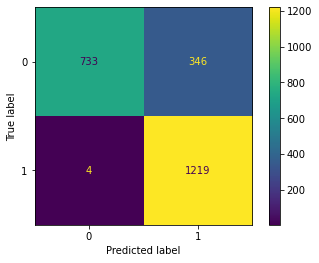

In [16]:
fs  ='SelectKBest'
best_classifier = test_best(DecisionTreeClassifier, tr, ts, tr_target, ts_target, f'{out_dir}decision_tree/{fs}/', results_df=None, in_path=f'results/decision_tree/{fs}/gs_results.csv')

Best combo:
	params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 32, 'random_state': 42, 'splitter': 'best'}
	mean_train_accuracy: 0.8597653775414226
	mean_train_recall: 0.9924381908069896
	mean_train_precision: 0.794763405918028
	mean_train_f1: 0.88266850550571
	mean_val_accuracy: 0.8597654345879913
	mean_val_recall: 0.992438301294898
	mean_val_precision: 0.7947692031056501
	mean_val_f1: 0.882669648811985

Test set metrics: 
Accuracy 0.8462206776715899
Precision test set  0.8767529841252757
Recall test set  0.8462206776715899
F1 score test set  0.8413277030951167
Support test set  (array([0.98788694, 0.7787043 ]), array([0.6802595 , 0.99264105]), array([0.80570801, 0.87275341]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.68      0.81      1079
         bot       0.78      0.99      0.87      1223


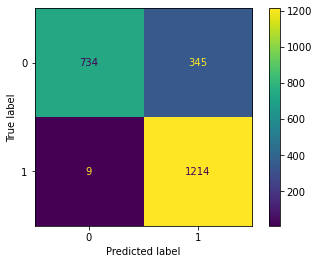

In [17]:
fs = 'SelectFromModel'
best_classifer = test_best(DecisionTreeClassifier, tr, ts, tr_target, ts_target, f'{out_dir}decision_tree/{fs}/', results_df=None, in_path=f'results/decision_tree/{fs}/gs_results.csv')

Best combo:
	params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
	mean_train_accuracy: 0.8597653775414226
	mean_train_recall: 0.9923019510249732
	mean_train_precision: 0.7948277639707649
	mean_train_f1: 0.8826542538978935
	mean_val_accuracy: 0.8598740830017244
	mean_val_recall: 0.992438301294898
	mean_val_precision: 0.7948993859917115
	mean_val_f1: 0.8827499501899962

Test set metrics: 
Accuracy 0.8462206776715899
Precision test set  0.8767529841252757
Recall test set  0.8462206776715899
F1 score test set  0.8413277030951167
Support test set  (array([0.98788694, 0.7787043 ]), array([0.6802595 , 0.99264105]), array([0.80570801, 0.87275341]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.68      0.81      1079
         bot       0.78      0.99      0.87      12

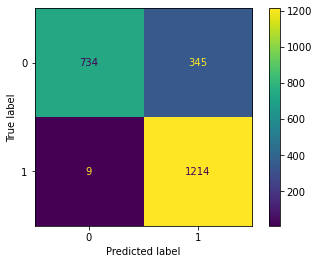

In [18]:
fs = 'RFECV'
best_classifer = test_best(DecisionTreeClassifier, tr, ts, tr_target, ts_target, f'{out_dir}decision_tree/{fs}/', results_df=None, in_path=f'results/decision_tree/{fs}/gs_results.csv')

Best combo:
	params: {'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
	mean_train_accuracy: 0.8600188275663009
	mean_train_recall: 0.9923700709159814
	mean_train_precision: 0.7950995827137397
	mean_train_f1: 0.8828486642803308
	mean_val_accuracy: 0.8600913798291907
	mean_val_recall: 0.992438301294898
	mean_val_precision: 0.795158312465954
	mean_val_f1: 0.8829101759015491

Test set metrics: 
Accuracy 0.8470894874022589
Precision test set  0.8785860242790611
Recall test set  0.8470894874022589
F1 score test set  0.8421214296940486
Support test set  (array([0.99188092, 0.77863084]), array([0.67933272, 0.99509403]), array([0.80638064, 0.87365398]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.68      0.81      1079
         bot       0.78      1.00      0.87      122

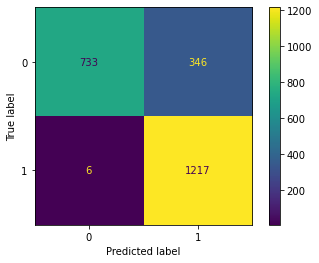

In [19]:
best_classifier = test_best(DecisionTreeClassifier, tr, ts, tr_target, ts_target, out_dir+'decision_tree/', results_df=None, in_path='results/decision_tree/gs_results.csv')

# Naive Bayes

In [33]:
labels = ['genuine user','bot']
parameters = {
    'alpha':[0.25,0.5,0.75,1, 2, 10, 1e2, 1e4],
    'fit_prior': [True, False]
}

In [35]:
nb_out_dir = 'mn_naive_bayes'
try:
    os.mkdir(out_dir+nb_out_dir)
except FileExistsError:
    pass

In [ ]:
results_df = grid_search(MultinomialNB, parameters, 'mn_naive_bayes', tr, tr_target)

In [ ]:
grid_search_with_feature_selection(MultinomialNB, parameters, nb_out_dir, tr, ts, tr_target, ts_target)

Best combo:
	params: {'alpha': 0.25, 'fit_prior': False}
	mean_train_accuracy: 0.8105944627593654
	mean_train_recall: 0.9734995985957908
	mean_train_precision: 0.7469203271105075
	mean_train_f1: 0.8452885896905857
	mean_val_accuracy: 0.8116435795867093
	mean_val_recall: 0.9742495083342686
	mean_val_precision: 0.747774062680267
	mean_val_f1: 0.8461171540102062

Test set metrics: 
Accuracy 0.7984361424847958
Precision test set  0.8364979361786584
Recall test set  0.7984361424847958
F1 score test set  0.789669813078634
Support test set  (array([0.95287187, 0.73382625]), array([0.59962929, 0.97383483]), array([0.73606371, 0.83696416]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.95      0.60      0.74      1079
         bot       0.73      0.97      0.84      1223

    accuracy                           0.80      2302
   macro avg       0.84      0.79      0.79      2302
weighted avg       0.84      0.80      0.79      2302


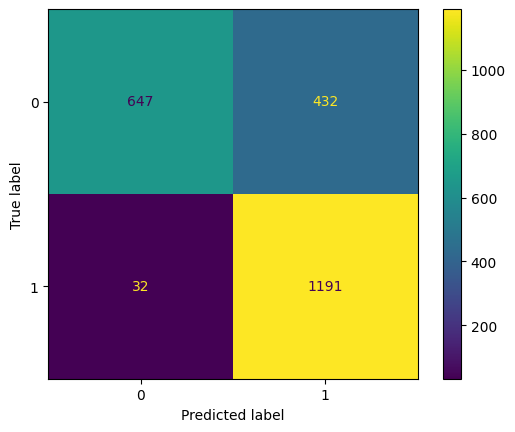

In [45]:
fs = 'SelectKBest'
best_classifer = test_best(MultinomialNB, tr, ts, tr_target, ts_target, out_dir+'mn_naive_bayes/'+fs, results_df=None, in_path=f'results/mn_naive_bayes/{fs}/gs_results.csv')

Best combo:
	params: {'alpha': 0.25, 'fit_prior': False}
	mean_train_accuracy: 0.8093271811700423
	mean_train_recall: 0.987533057363298
	mean_train_precision: 0.7403864208154511
	mean_train_f1: 0.8462840912216216
	mean_val_accuracy: 0.8094713192730392
	mean_val_recall: 0.988146079500211
	mean_val_precision: 0.7403323256864524
	mean_val_f1: 0.8464691527203699

Test set metrics: 
Accuracy 0.7975673327541268
Precision test set  0.845188768998309
Recall test set  0.7975673327541268
F1 score test set  0.7871644431539977
Support test set  (array([0.97815913, 0.72787477]), array([0.58109361, 0.98855274]), array([0.72906977, 0.83841886]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.98      0.58      0.73      1079
         bot       0.73      0.99      0.84      1223

    accuracy                           0.80      2302
   macro avg       0.85      0.78      0.78      2302
weighted avg       0.85      0.80      0.79      2302



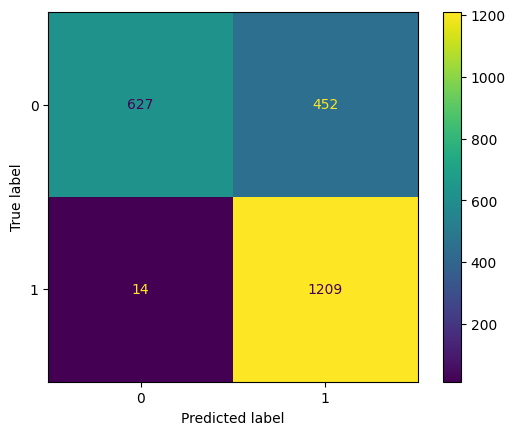

In [46]:
fs= 'SelectFromModel'
best_classifer = test_best(MultinomialNB, tr, ts, tr_target, ts_target, out_dir+'mn_naive_bayes/'+fs, results_df=None, in_path=f'results/mn_naive_bayes/{fs}/gs_results.csv')

Best combo:
	params: {'alpha': 0.25, 'fit_prior': False}
	mean_train_accuracy: 0.8133462808031192
	mean_train_recall: 0.9905988052190716
	mean_train_precision: 0.743483139889147
	mean_train_f1: 0.8494328175281199
	mean_val_accuracy: 0.8129472189593087
	mean_val_recall: 0.9899863188666036
	mean_val_precision: 0.743316067109878
	mean_val_f1: 0.8490902720564439

Test set metrics: 
Accuracy 0.7988705473501303
Precision test set  0.8464878131035474
Recall test set  0.7988705473501303
F1 score test set  0.7885783589279799
Support test set  (array([0.97975078, 0.72891566]), array([0.58294717, 0.9893704 ]), array([0.73097037, 0.8394034 ]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.98      0.58      0.73      1079
         bot       0.73      0.99      0.84      1223

    accuracy                           0.80      2302
   macro avg       0.85      0.79      0.79      2302
weighted avg       0.85      0.80      0.79      2302


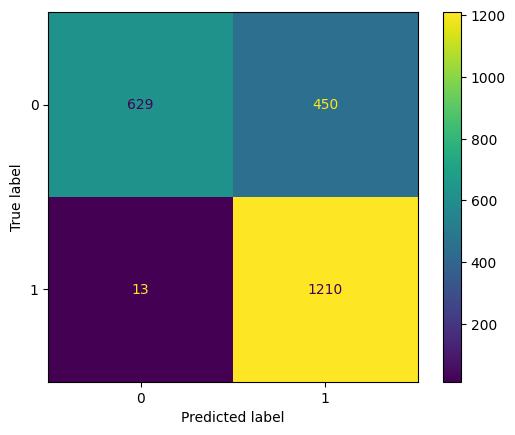

In [47]:
fs = 'RFECV'
best_classifer = test_best(MultinomialNB, tr, ts, tr_target, ts_target, out_dir+'mn_naive_bayes/'+fs, results_df=None, in_path=f'results/mn_naive_bayes/{fs}/gs_results.csv')

Best combo:
	params: {'alpha': 0.25, 'fit_prior': False}
	mean_train_accuracy: 0.8060323518232458
	mean_train_recall: 0.9732951089584062
	mean_train_precision: 0.7421069878672022
	mean_train_f1: 0.8421215335989997
	mean_val_accuracy: 0.8053449922237564
	mean_val_recall: 0.9720011062478958
	mean_val_precision: 0.7418548841221464
	mean_val_f1: 0.8414746735329897

Test set metrics: 
Accuracy 0.7919200695047784
Precision test set  0.832428721003873
Recall test set  0.7919200695047784
F1 score test set  0.7822400807273922
Support test set  (array([0.95180723, 0.72710623]), array([0.58572753, 0.97383483]), array([0.72518646, 0.83257602]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.95      0.59      0.73      1079
         bot       0.73      0.97      0.83      1223

    accuracy                           0.79      2302
   macro avg       0.84      0.78      0.78      2302
weighted avg       0.83      0.79      0.78      2302

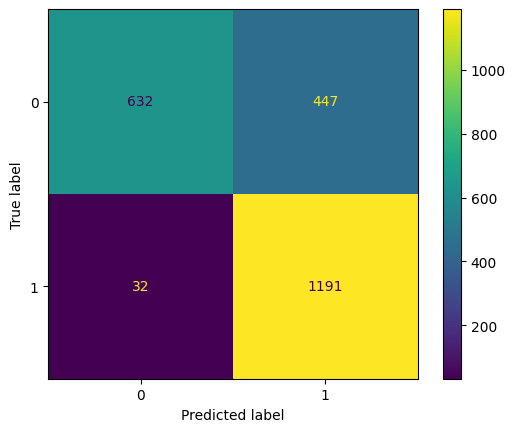

In [50]:
best_classifer = test_best(MultinomialNB, tr, ts, tr_target, ts_target, out_dir+'mn_naive_bayes/', results_df=None, in_path=f'results/mn_naive_bayes/gs_results.csv')

# Random Forest

In [ ]:
parameters = {
    "n_estimators": range(50,500,100),
    "criterion": ["gini","entropy","log_loss"],
    "max_depth": [None] + list(range(5,100,10)),
    "min_samples_split": [2,4,8,16,32,64],
    "min_samples_leaf": [2,4,8,16,32,64,128],
    "max_features":["auto","sqrt","log2",None],
    "max_leaf_nodes":[None] + list(range(1,10,2)),
    "min_impurity_decrease": 0.1 * np.array(range(1,5))
}

In [63]:
results_df = grid_search(RandomForestClassifier, parameters, 'random_forest', tr, ts, tr_target, ts_target)

In [ ]:
grid_search_with_feature_selection(RandomForestClassifier, parameters, 'random_forest', tr, ts, tr_target, ts_target)

Best combo:
	params: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 65}
	mean_train_accuracy: 0.912737937813548
	mean_train_recall: 0.9974112584783178
	mean_train_precision: 0.8605825045594472
	mean_train_f1: 0.9239574069116652
	mean_val_accuracy: 0.8536823977487218
	mean_val_recall: 0.9828319478513674
	mean_val_precision: 0.7920222242608351
	mean_val_f1: 0.8771601339594395

Test set metrics: 
Accuracy 0.843614248479583
Precision test set  0.8621471508030965
Recall test set  0.843614248479583
F1 score test set  0.840162268443884
Support test set  (array([0.94547708, 0.78862876]), array([0.70713624, 0.96402289]), array([0.80911983, 0.86754967]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.95      0.71      0.81      1079
         bot       0.79      0.96      0.87      1223

    accuracy                           0.84      2302
   macro avg  

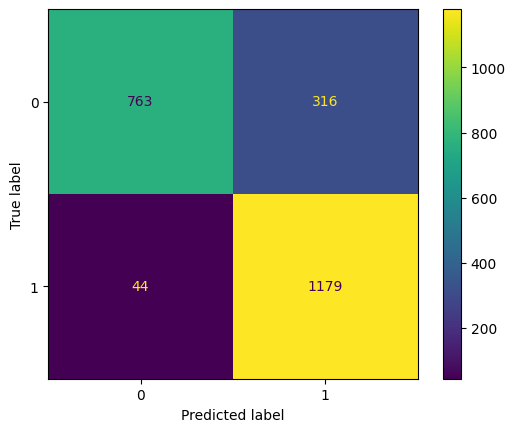

In [8]:
best_classifer = test_best(RandomForestClassifier, tr, ts, tr_target, ts_target, out_dir+'random_forest/', results_df=None, in_path=f'results/random_forest/gs_results.csv', sep='#')

Best combo:
	params: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 6, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 100, 'min_samples_split': 4, 'n_estimators': 80}
	mean_train_accuracy: 0.8601998348300852
	mean_train_recall: 0.991416281043844
	mean_train_precision: 0.7957684092749034
	mean_train_f1: 0.8828830824753923
	mean_val_accuracy: 0.8601995562689284
	mean_val_recall: 0.991416057428695
	mean_val_precision: 0.7957739362114516
	mean_val_f1: 0.8828846749530941

Test set metrics: 
Accuracy 0.8566463944396178
Precision test set  0.8846017605887055
Recall test set  0.8566463944396178
F1 score test set  0.8525052359275155
Support test set  (array([0.99211564, 0.78974692]), array([0.69972196, 0.99509403]), array([0.82065217, 0.88060781]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.70      0.82      1079
         bot       0.79      1.00      0.88      1223

    accuracy

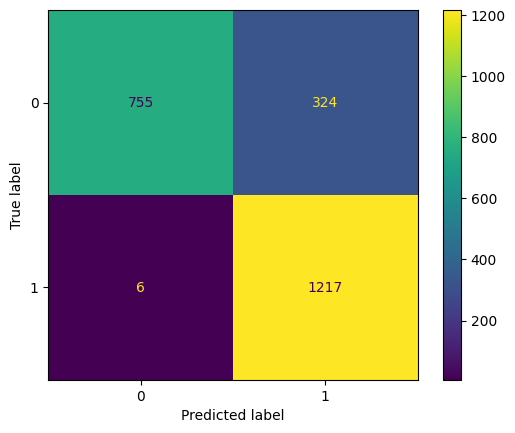

In [33]:
fs = 'SelectKBest'
best_classifer = test_best(RandomForestClassifier, tr, ts, tr_target, ts_target, out_dir+'random_forest/'+fs, results_df=None, in_path=f'results/random_forest/{fs}/gs_results.csv', sep='#')

Best combo:
	params: {'criterion': 'entropy', 'max_depth': 25, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 55, 'min_samples_split': 4, 'n_estimators': 30}
	mean_train_accuracy: 0.8601998348300852
	mean_train_recall: 0.991416281043844
	mean_train_precision: 0.7957684092749034
	mean_train_f1: 0.8828830824753923
	mean_val_accuracy: 0.8601995562689284
	mean_val_recall: 0.991416057428695
	mean_val_precision: 0.7957739362114516
	mean_val_f1: 0.8828846749530941

Test set metrics: 
Accuracy 0.8566463944396178
Precision test set  0.8846017605887055
Recall test set  0.8566463944396178
F1 score test set  0.8525052359275155
Support test set  (array([0.99211564, 0.78974692]), array([0.69972196, 0.99509403]), array([0.82065217, 0.88060781]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.70      0.82      1079
         bot       0.79      1.00      0.88      1223

    accuracy

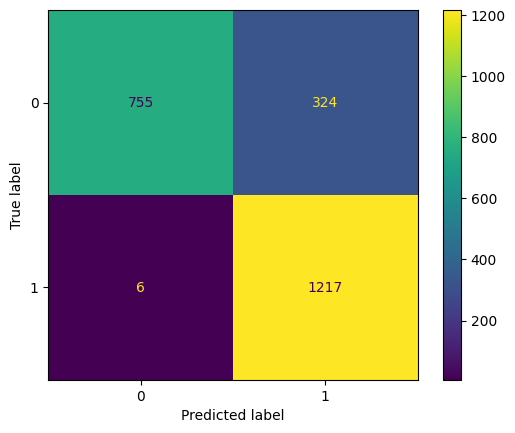

In [8]:
fs = 'SelectFromModel'
best_classifer = test_best(RandomForestClassifier, tr, ts, tr_target, ts_target, out_dir+'random_forest/'+fs, results_df=None, in_path=f'results/random_forest/{fs}/gs_results.csv', sep='#')

Best combo:
	params: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 55, 'min_samples_split': 4, 'n_estimators': 30}
	mean_train_accuracy: 0.8601998348300852
	mean_train_recall: 0.991416281043844
	mean_train_precision: 0.7957684092749034
	mean_train_f1: 0.8828830824753923
	mean_val_accuracy: 0.8601995562689284
	mean_val_recall: 0.991416057428695
	mean_val_precision: 0.7957739362114516
	mean_val_f1: 0.8828846749530941

Test set metrics: 
Accuracy 0.8566463944396178
Precision test set  0.8846017605887055
Recall test set  0.8566463944396178
F1 score test set  0.8525052359275155
Support test set  (array([0.99211564, 0.78974692]), array([0.69972196, 0.99509403]), array([0.82065217, 0.88060781]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.70      0.82      1079
         bot       0.79      1.00      0.88      1223

    accura

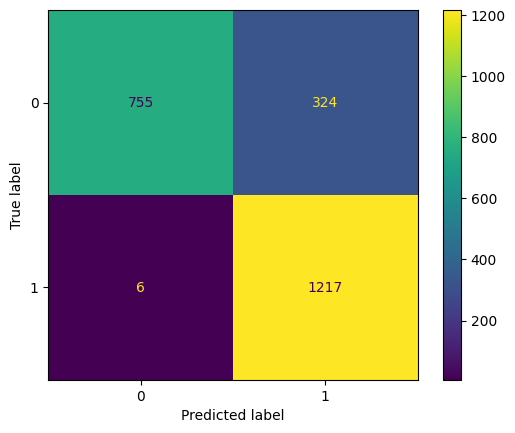

In [10]:
fs = 'RFECV'
best_classifer = test_best(RandomForestClassifier, tr, ts, tr_target, ts_target, out_dir+'random_forest/'+fs, results_df=None, in_path=f'results/random_forest/{fs}/gs_results.csv', sep='#')

# SVM

In [11]:
parameters_linear = {
    'C': [10**(exp) for exp in [-2,-1,1,2,3,4]],
    'kernel': ['linear'],
    'random_state': [42]
}

gamma_range = ['scale','auto'] + [10**(exp) for exp in [-2,-1,0]]

parameters_poly = {
    **parameters_linear,
    'kernel': ['poly'],
    'degree': list(range(2,6)),
    'gamma': gamma_range,
}

parameters_rbf = {
    **parameters_linear,
    'kernel': ['rbf'],
    'gamma': gamma_range
}

In [ ]:
results_df = grid_search(SVC, [parameters_rbf, parameters_linear, parameters_poly], 'svm_all_kernels',tr, tr_target, n_jobs=6)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


In [ ]:
grid_search_with_feature_selection(SVC, [parameters_rbf, parameters_linear, parameters_poly], 'svm_all_kernels', tr, ts, tr_target, ts_target, n_jobs=6,
                                   folds=4, n_features=15)

Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8246795663796785
	mean_train_recall: 1.0
	mean_train_precision: 0.7519650959094468
	mean_train_f1: 0.8584231110151541
	mean_val_accuracy: 0.8246796429309056
	mean_val_recall: 1.0
	mean_val_precision: 0.7520103452151284
	mean_val_f1: 0.8584395562366042

Test set metrics: 
Accuracy 0.8149435273675065
Precision test set  0.8627507179930022
Recall test set  0.8149435273675065
F1 score test set  0.8059100198286384
Support test set  (array([1.        , 0.74166161]), array([0.60518999, 1.        ]), array([0.75404157, 0.85167131]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.61      0.75      1079
         bot       0.74      1.00      0.85      1223

    accuracy                           0.81      2302
   macro avg       0.87      0.80      0.80      2302
weighted avg       0.86      0.81      0.81      2302



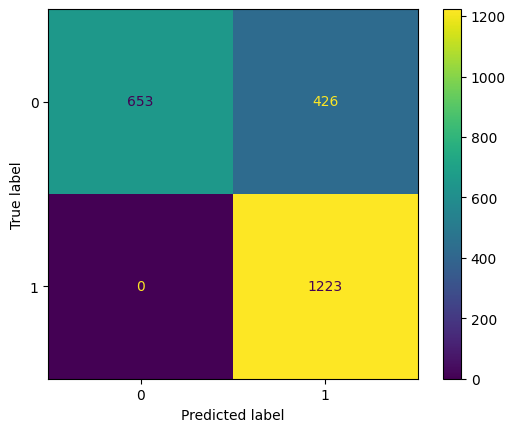

In [37]:
fs = 'SelectKBest'
best_classifer = test_best(SVC, tr, ts, tr_target, ts_target, out_dir+'svm_all_kernels/'+fs, results_df=None, in_path=f'results/svm_all_kernels/{fs}/gs_results.csv')

Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8246795663796785
	mean_train_recall: 1.0
	mean_train_precision: 0.7519650959094468
	mean_train_f1: 0.8584231110151541
	mean_val_accuracy: 0.8246796429309056
	mean_val_recall: 1.0
	mean_val_precision: 0.7520103452151284
	mean_val_f1: 0.8584395562366042

Test set metrics: 
Accuracy 0.8149435273675065
Precision test set  0.8627507179930022
Recall test set  0.8149435273675065
F1 score test set  0.8059100198286384
Support test set  (array([1.        , 0.74166161]), array([0.60518999, 1.        ]), array([0.75404157, 0.85167131]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.61      0.75      1079
         bot       0.74      1.00      0.85      1223

    accuracy                           0.81      2302
   macro avg       0.87      0.80      0.80      2302
weighted avg       0.86      0.81      0.81      2302



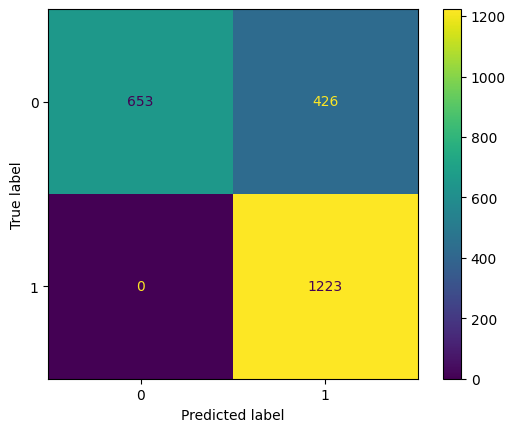

In [38]:
fs = 'SelectFromModel'
best_classifer = test_best(SVC, tr, ts, tr_target, ts_target, out_dir+'svm_all_kernels/'+fs, results_df=None, in_path=f'results/svm_all_kernels/{fs}/gs_results.csv')

Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8246795663796785
	mean_train_recall: 1.0
	mean_train_precision: 0.7519650959094468
	mean_train_f1: 0.8584231110151541
	mean_val_accuracy: 0.8246796429309056
	mean_val_recall: 1.0
	mean_val_precision: 0.7520103452151284
	mean_val_f1: 0.8584395562366042

Test set metrics: 
Accuracy 0.8149435273675065
Precision test set  0.8627507179930022
Recall test set  0.8149435273675065
F1 score test set  0.8059100198286384
Support test set  (array([1.        , 0.74166161]), array([0.60518999, 1.        ]), array([0.75404157, 0.85167131]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.61      0.75      1079
         bot       0.74      1.00      0.85      1223

    accuracy                           0.81      2302
   macro avg       0.87      0.80      0.80      2302
weighted avg       0.86      0.81      0.81      2302



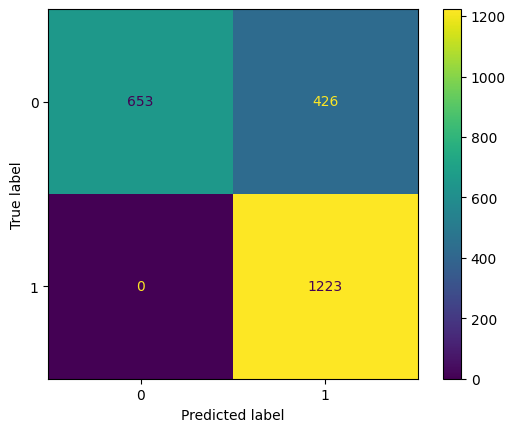

In [39]:
fs = 'RFECV'
best_classifer = test_best(SVC, tr, ts, tr_target, ts_target, out_dir+'svm_all_kernels/'+fs, results_df=None, in_path=f'results/svm_all_kernels/{fs}/gs_results.csv')

Best combo:
	params: {'C': 10000, 'kernel': 'linear', 'random_state': 42}
	mean_train_accuracy: 0.8261640661250224
	mean_train_recall: 0.9999318615426548
	mean_train_precision: 0.7535698112013063
	mean_train_f1: 0.8594437754682707
	mean_val_accuracy: 0.8255482166745769
	mean_val_recall: 0.999387087895938
	mean_val_precision: 0.7531360947561477
	mean_val_f1: 0.8589556663545336

Test set metrics: 
Accuracy 0.8149435273675065
Precision test set  0.8627507179930022
Recall test set  0.8149435273675065
F1 score test set  0.8059100198286384
Support test set  (array([1.        , 0.74166161]), array([0.60518999, 1.        ]), array([0.75404157, 0.85167131]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.61      0.75      1079
         bot       0.74      1.00      0.85      1223

    accuracy                           0.81      2302
   macro avg       0.87      0.80      0.80      2302
weighted avg       0.86      0.81   

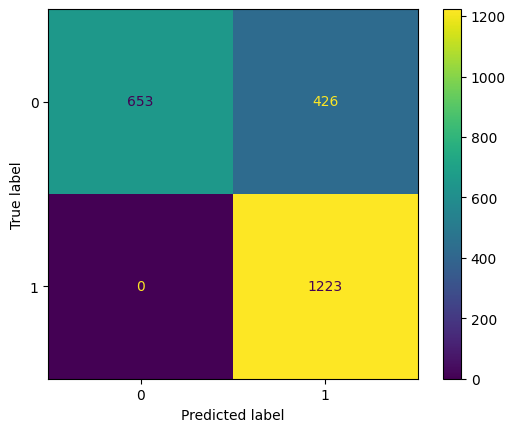

In [55]:
best_classifer = test_best(SVC, tr, ts, tr_target, ts_target, out_dir+'svm_all_kernels/', results_df=None, in_path=f'results/svm_all_kernels/gs_results.csv')

# NN

In [ ]:
# These parameters are a selection from a more coarse grid search
parameters = {
    "hidden_layer_sizes": [[5], [10], [64,32,16]],
    "activation": ["logistic", "tanh"],
    "solver": ["sgd", "adam"],
    "alpha": [1e-5, 1e-8],
    "batch_size": [8, 16, 32],
    "learning_rate_init": [1e-2, 1e-3, 5e-3],
    "learning_rate": ['constant', 'adaptive'],
    "momentum": [0.0, 0.2, 0.4, 0.6, 0.8]
}

In [ ]:
results_df = grid_search(MLPClassifier, parameters, 'nn', tr, ts, tr_target, ts_target)

In [ ]:
grid_search_with_feature_selection(MLPClassifier, parameters, 'nn', tr, ts, tr_target, ts_target, n_jobs=2,
                                       folds=4, n_features=25)

Best combo:
	params: {'activation': 'logistic', 'alpha': 1e-05, 'batch_size': 32, 'hidden_layer_sizes': [64, 32, 16], 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'momentum': 0.8, 'solver': 'adam'}
	mean_train_accuracy: 0.8399413672061252
	mean_train_recall: 0.9980584221033184
	mean_train_precision: 0.7693819421628667
	mean_train_f1: 0.8689170228437654
	mean_val_accuracy: 0.8381475511644819
	mean_val_recall: 0.9969343953075944
	mean_val_precision: 0.7680142912958771
	mean_val_f1: 0.8675727375592185

Test set metrics: 
Accuracy 0.8214596003475239
Precision test set  0.8602075208484858
Recall test set  0.8214596003475239
F1 score test set  0.814146915570768
Support test set  (array([0.98265896, 0.75217391]), array([0.63021316, 0.99018806]), array([0.76792772, 0.85492411]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.98      0.63      0.77      1079
         bot       0.75      0.99      0.85      1223

    acc

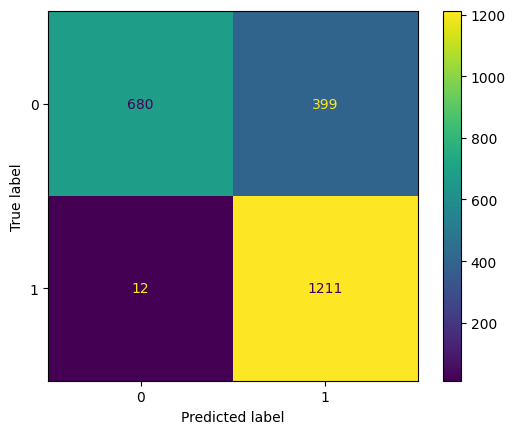

In [12]:
best_classifier = test_best(MLPClassifier, tr, ts, tr_target, ts_target, out_dir+'nn/', results_df=None, in_path='results/nn/gs_results.csv', sep='#')

Best combo:
	params: {'activation': 'logistic', 'alpha': 1e-08, 'batch_size': 16, 'hidden_layer_sizes': [10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'momentum': 0.0, 'solver': 'adam'}
	mean_train_accuracy: 0.8302918246555848
	mean_train_recall: 0.9991143857178822
	mean_train_precision: 0.758325013980762
	mean_train_f1: 0.8622241358596783
	mean_val_accuracy: 0.8294590875949752
	mean_val_recall: 0.997752098931696
	mean_val_precision: 0.757965577159291
	mean_val_f1: 0.8614813528430807

Test set metrics: 
Accuracy 0.8236316246741964
Precision test set  0.8654927442053456
Recall test set  0.8236316246741964
F1 score test set  0.8160307982829538
Support test set  (array([0.99412628, 0.75200494]), array([0.62743281, 0.99672935]), array([0.76931818, 0.85724332]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.63      0.77      1079
         bot       0.75      1.00      0.86      1223

    accuracy     

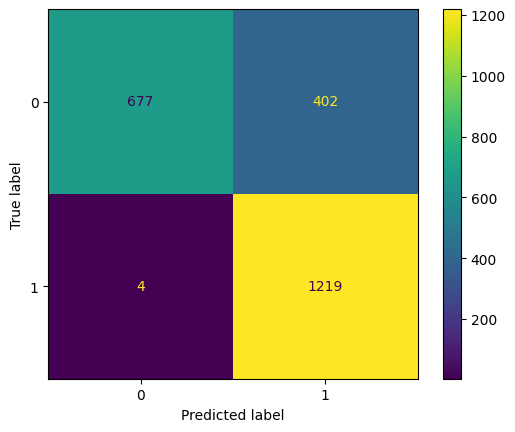

In [34]:
fs = 'SelectKBest'
best_classifer = test_best(MLPClassifier, tr, ts, tr_target, ts_target, out_dir+'nn/'+fs, results_df=None, in_path=f'results/nn/{fs}/gs_results.csv', sep='#')

Best combo:
	params: {'activation': 'logistic', 'alpha': 1e-08, 'batch_size': 8, 'hidden_layer_sizes': [10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'momentum': 0.0, 'solver': 'adam'}
	mean_train_accuracy: 0.8294952374679372
	mean_train_recall: 0.9993187825235812
	mean_train_precision: 0.7573839104326016
	mean_train_f1: 0.8616913685898813
	mean_val_accuracy: 0.8294590403975759
	mean_val_recall: 0.999386920889915
	mean_val_precision: 0.7573251088684758
	mean_val_f1: 0.8616765353796249

Test set metrics: 
Accuracy 0.8245004344048653
Precision test set  0.8680786916270131
Recall test set  0.8245004344048653
F1 score test set  0.816727884478634
Support test set  (array([1.        , 0.75169023]), array([0.62557924, 1.        ]), array([0.76966933, 0.85824561]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.63      0.77      1079
         bot       0.75      1.00      0.86      1223

    accuracy     

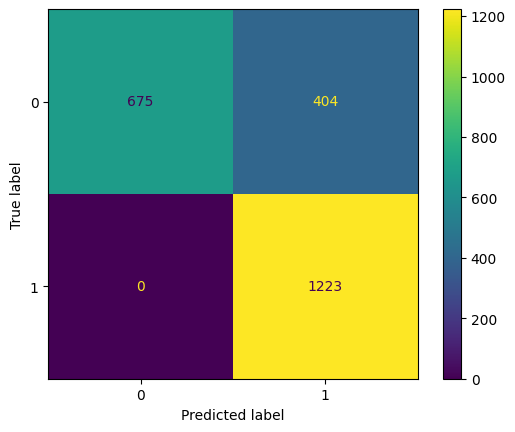

In [14]:
fs = 'SelectFromModel'
best_classifer = test_best(MLPClassifier, tr, ts, tr_target, ts_target, out_dir+'nn/'+fs, results_df=None, in_path=f'results/nn/{fs}/gs_results.csv', sep='#')

Best combo:
	params: {'activation': 'logistic', 'alpha': 1e-08, 'batch_size': 8, 'hidden_layer_sizes': [10], 'learning_rate': 'adaptive', 'learning_rate_init': 0.005, 'momentum': 0.2, 'solver': 'adam'}
	mean_train_accuracy: 0.8299297367098422
	mean_train_recall: 0.9995231236302684
	mean_train_precision: 0.7577735686354385
	mean_train_f1: 0.8620195647550997
	mean_val_accuracy: 0.8291330479589768
	mean_val_recall: 0.998569426407794
	mean_val_precision: 0.7572901238398123
	mean_val_f1: 0.8613507293662255

Test set metrics: 
Accuracy 0.8249348392701998
Precision test set  0.8672760659776139
Recall test set  0.8249348392701998
F1 score test set  0.8173556222625663
Support test set  (array([0.99705882, 0.75277435]), array([0.62835959, 0.99836468]), array([0.77089255, 0.85834798]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       1.00      0.63      0.77      1079
         bot       0.75      1.00      0.86      1223

    accuracy    

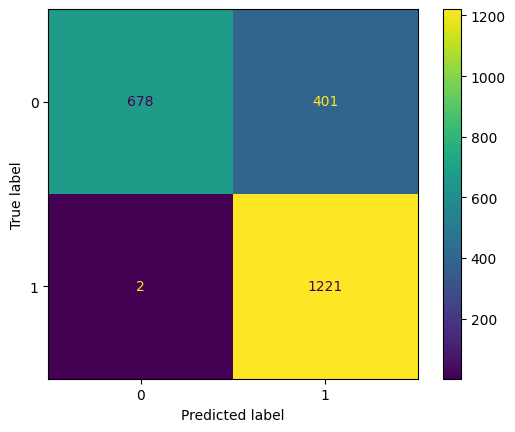

In [15]:
fs = 'RFECV'
best_classifer = test_best(MLPClassifier, tr, ts, tr_target, ts_target, out_dir+'nn/'+fs, results_df=None, in_path=f'results/nn/{fs}/gs_results.csv', sep='#')

# Adaboost

In [27]:
parameters = {
    'base_estimator': [SVC(C=10000, kernel='linear', random_state=42), DecisionTreeClassifier(max_depth=4, min_samples_split=2, criterion='gini', min_impurity_decrease=0.0, min_samples_leaf=1, splitter='best', random_state=42), MLPClassifier(activation='logistic', alpha=1e-5, batch_size=32, hidden_layer_sizes=[64,32,16], learning_rate='adaptive', learning_rate_init=5e-3, momentum=0.8, solver='adam')],
    'n_estimators': [4,8,16,32,64,128,256],
    'learning_rate': [1e-3,1e-2, 1e-1, 1, 1e1, 1e2],
    'random_state': [42],
    'algorithm': ['SAMME']
}

In [ ]:
results_df = grid_search(AdaBoostClassifier, parameters, 'adaboost', tr, tr_target)

In [ ]:
grid_search_with_feature_selection(AdaBoostClassifier, parameters, 'adaboost', tr, ts, tr_target, ts_target, n_jobs=6, folds=4, n_features=15)

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.1, 'n_estimators': 128, 'random_state': 42}
	mean_train_accuracy: 0.8600188800078536
	mean_train_recall: 0.9911438386124856
	mean_train_precision: 0.7956814772157466
	mean_train_f1: 0.8827207577110122
	mean_val_accuracy: 0.8590053676658544
	mean_val_recall: 0.990803312330656
	mean_val_precision: 0.7946533938116093
	mean_val_f1: 0.8819401705831882

Test set metrics: 
Accuracy 0.8562119895742832
Precision test set  0.8839189543886589
Recall test set  0.8562119895742832
F1 score test set  0.8520810562175981
Support test set  (array([0.99081365, 0.78961039]), array([0.69972196, 0.99427637]), array([0.82020641, 0.88020268]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.70      0.82      1079
         bot       0.79      0.99      0.88      1223

    accuracy                           

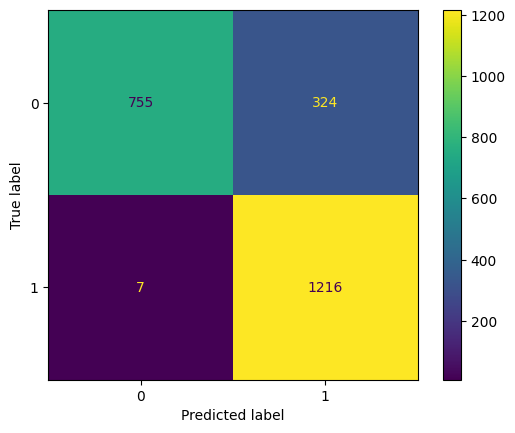

In [41]:
best_classifier = test_best(AdaBoostClassifier, tr, ts, tr_target, ts_target, out_dir+'adaboost/', results_df=None, in_path='results/adaboost/gs_results.csv')

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.001, 'n_estimators': 4, 'random_state': 42}
	mean_train_accuracy: 0.8575204595474252
	mean_train_recall: 0.9907351378327738
	mean_train_precision: 0.7928812331117361
	mean_train_f1: 0.8808336400442589
	mean_val_accuracy: 0.8567238453722572
	mean_val_recall: 0.9905993979766888
	mean_val_precision: 0.792006865371252
	mean_val_f1: 0.8802348543644314

Test set metrics: 
Accuracy 0.8509991311902694
Precision test set  0.8789596023964074
Recall test set  0.8509991311902694
F1 score test set  0.8466236233074147
Support test set  (array([0.98548813, 0.78497409]), array([0.69230769, 0.99100572]), array([0.81328253, 0.87603903]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.78      0.99      0.88      1223

    accuracy                           

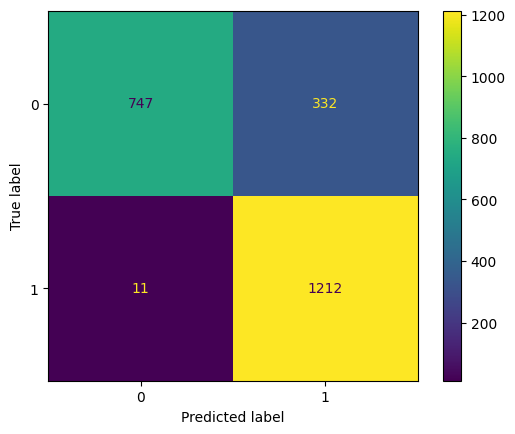

In [52]:
fs = 'SelectKBest'
best_classifer = test_best(AdaBoostClassifier, tr, ts, tr_target, ts_target, out_dir+'adaboost/'+fs, results_df=None, in_path=f'results/adaboost/{fs}/gs_results.csv')

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.01, 'n_estimators': 256, 'random_state': 42}
	mean_train_accuracy: 0.8575566651955063
	mean_train_recall: 0.990803257723782
	mean_train_precision: 0.7928925421274545
	mean_train_f1: 0.8808675324800802
	mean_val_accuracy: 0.8567238925696568
	mean_val_recall: 0.9905993979766886
	mean_val_precision: 0.7920084278756813
	mean_val_f1: 0.8802348951647359

Test set metrics: 
Accuracy 0.8514335360556038
Precision test set  0.8796437422880939
Recall test set  0.8514335360556038
F1 score test set  0.8470469786976677
Support test set  (array([0.98678996, 0.78511327]), array([0.69230769, 0.99182339]), array([0.81372549, 0.87644509]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.79      0.99      0.88      1223

    accuracy                          

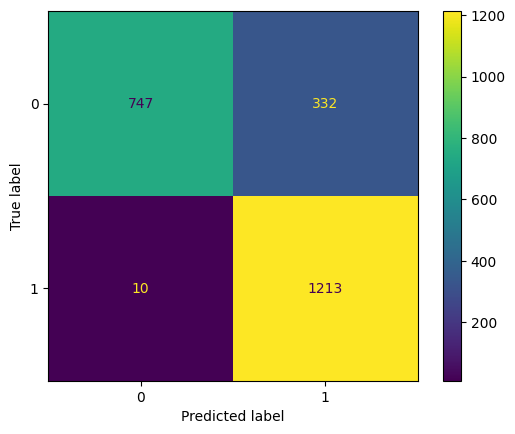

In [53]:
fs = 'SelectFromModel'
best_classifer = test_best(AdaBoostClassifier, tr, ts, tr_target, ts_target, out_dir+'adaboost/'+fs, results_df=None, in_path=f'results/adaboost/{fs}/gs_results.csv')

Best combo:
	params: {'algorithm': 'SAMME', 'base_estimator': DecisionTreeClassifier(max_depth=4, random_state=42), 'learning_rate': 0.01, 'n_estimators': 64, 'random_state': 42}
	mean_train_accuracy: 0.8575204595474252
	mean_train_recall: 0.9907351378327738
	mean_train_precision: 0.7928812331117361
	mean_train_f1: 0.8808336400442589
	mean_val_accuracy: 0.8566152913533231
	mean_val_recall: 0.9899861518605808
	mean_val_precision: 0.7921628578435297
	mean_val_f1: 0.880089234309505

Test set metrics: 
Accuracy 0.8509991311902694
Precision test set  0.8789596023964074
Recall test set  0.8509991311902694
F1 score test set  0.8466236233074147
Support test set  (array([0.98548813, 0.78497409]), array([0.69230769, 0.99100572]), array([0.81328253, 0.87603903]), array([1079, 1223], dtype=int64))
              precision    recall  f1-score   support

genuine_user       0.99      0.69      0.81      1079
         bot       0.78      0.99      0.88      1223

    accuracy                           

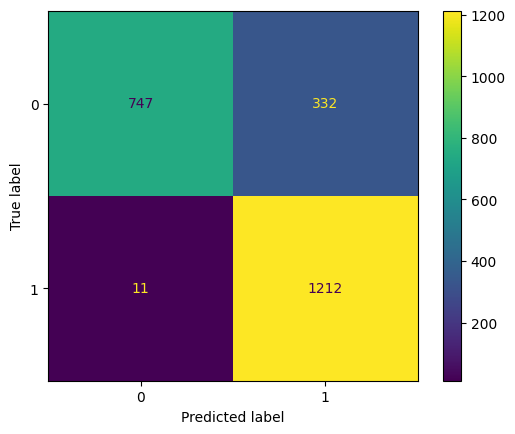

In [54]:
fs = 'RFECV'
best_classifer = test_best(AdaBoostClassifier, tr, ts, tr_target, ts_target, out_dir+'adaboost/'+fs, results_df=None, in_path=f'results/adaboost/{fs}/gs_results.csv')